In [101]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [102]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [103]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [104]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [105]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [106]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [107]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [108]:
# Create our session (link) from Python to the DB
sesh = Session(bind = engine)
# https://github.com/jf11235/project_2.git

# Exploratory Precipitation Analysis

In [109]:
# Find the most recent date in the data set.
chronological = sesh.query(measurement).order_by(measurement.date)
newest = chronological[0].date

<BarContainer object of 2784 artists>

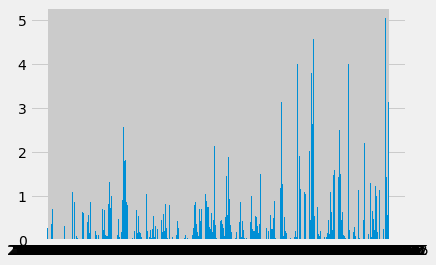

In [110]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date.fromisoformat(newest).year + 1

# Perform a query to retrieve the data and precipitation scores
last_year_entries = sesh.query(measurement).filter(measurement.date < year_ago) 
results = last_year_entries.all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df = pd.DataFrame.from_records([r.__dict__ for r in results], columns=measurement.__table__.columns.keys()) #thanks chatGPT

# Sort the dataframe by date
last_year_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(last_year_df["date"],last_year_df["prcp"])

In [111]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_df["prcp"].describe()

count    2681.000000
mean        0.138523
std         0.411995
min         0.000000
25%         0.000000
50%         0.010000
75%         0.090000
max         5.040000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [112]:
# Design a query to calculate the total number stations in the dataset
station_count =sesh.query(station).count()

In [113]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
roo= sesh.query(station.station, func.count(measurement.station)).\
        join(measurement, station.station == measurement.station).\
        group_by(station.station).\
        order_by(func.count(measurement.station).desc())
#getting station station and measurmetns counts
#combining them on station
# groouping by station to agg counts
# sorting

# print the query results
for result in roo:
    print(result)
busy_station = roo[0][0]

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [114]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = sesh.query(measurement).filter(measurement.station == busy_station)
result = temps.all()
busy_df = pd.DataFrame.from_records([r.__dict__ for r in result], columns=measurement.__table__.columns.keys()) #thanks chatGPT
busy_df.head()
busy_temp_stats = [busy_df["tobs"].min(),busy_df["tobs"].max(),busy_df["tobs"].mean(),]
print(busy_temp_stats)

[54.0, 85.0, 71.66378066378067]


(array([ 1.,  8.,  4., 20., 22., 52., 70., 78., 61., 30., 13.,  5.]),
 array([58., 60., 62., 64., 66., 68., 70., 72., 74., 76., 78., 80., 82.]),
 <a list of 12 Patch objects>)

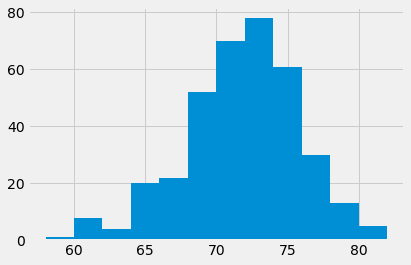

In [117]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
pres = sesh.query(measurement).filter(measurement.date < year_ago, measurement.station == busy_station)
res = pres.all()
last_year_busy_df = pd.DataFrame.from_records([r.__dict__ for r in res], columns=measurement.__table__.columns.keys()) #thanks chatGPT
last_year_busy_df.sort_values("date")

plt.hist(last_year_busy_df["tobs"], bins=12)

# Close session

In [116]:
# Close Session
sesh.close()